In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [3]:
from sklearn.metrics import classification_report

In [4]:
seed=4
tf.random.set_seed(4)

In [5]:
data = tf.keras.datasets.mnist

In [6]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)


In [8]:
X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train

array([5, 0, 4, ..., 4, 5, 6])

In [11]:

len(pd.unique(y_train))

10

In [14]:
valid_data = pd.read_csv('/train (1).csv')

In [15]:
test_data = pd.read_csv('/train (1).csv')

In [16]:
y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values

In [17]:
x_validation


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [18]:
y_validation

array([1, 0, 1, ..., 6, 5, 3])

In [20]:
x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)

x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

((70000, 28, 28), (70000,), (1716, 28, 28), (1716,))

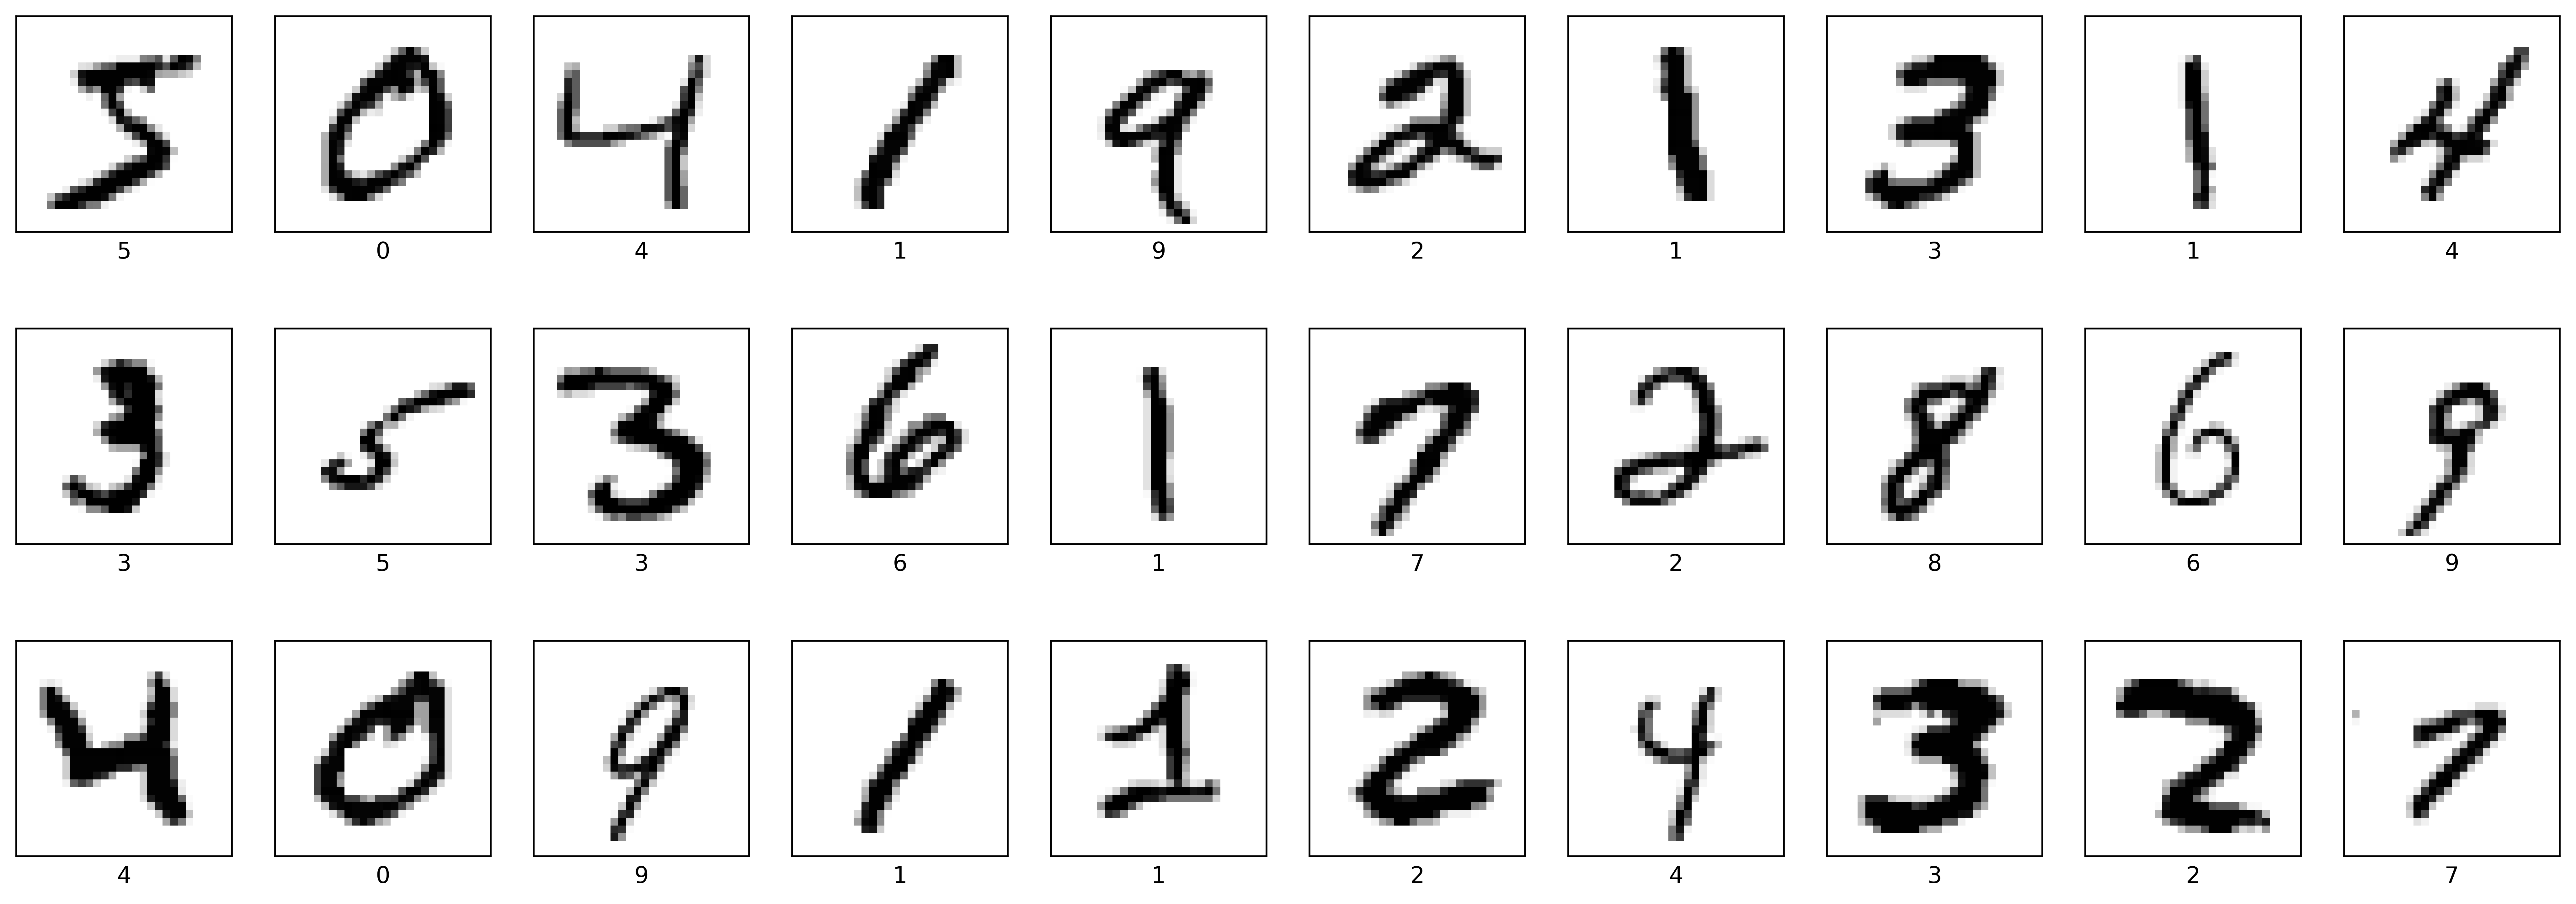

In [21]:
plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [22]:

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)

Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (1716, 28, 28, 1)


In [23]:
x_train, x_valid = x_train / 255, x_valid / 255

In [24]:
y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

In [25]:
batch = 100
epochs = 70

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch


700

In [27]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)

image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [28]:
print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
There are total 10 unique digits


In [29]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        65600     
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        16448     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          6

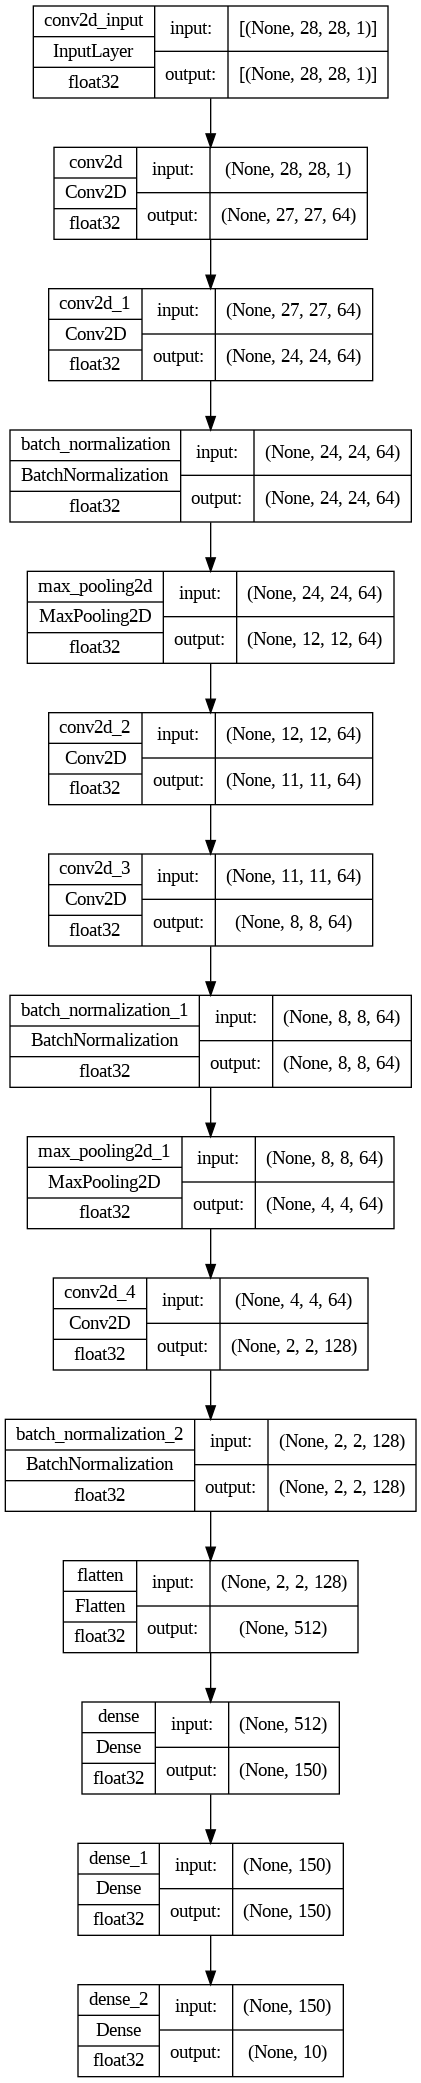

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)

In [32]:
lr_rate = 0.0001


In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)

In [34]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')


In [35]:
tn = tf.keras.callbacks.TerminateOnNaN()

In [36]:
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [37]:
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4,
                                                  verbose = 3)

In [38]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate)

In [39]:
model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])

In [42]:
loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')



54/54 [==============================] - 4s 72ms/step - loss: nan - accuracy: 0.9965
The accuracy of model on unknown data is 99.6503 %
